<a href="https://colab.research.google.com/github/azdinelaaouissi/Pfa/blob/main/dl_form6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas  as  pd
import  numpy  as  np
import  matplotlib.pyplot  as  plt
import  seaborn  as  sns
from  matplotlib.image  import  imread
import  os
import  warnings
warnings.filterwarnings('ignore')


In [ ]:
import  requests,zipfile,io
zip_file_url = 'https://moncoachdata.com/wp-content/uploads/cell_images.zip'
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
my_data_dir = 'cell_images'
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [ ]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [ ]:
os.listdir(test_path+'parasitized')[0]

'C39P4thinF_original_IMG_20150622_110900_cell_8.png'

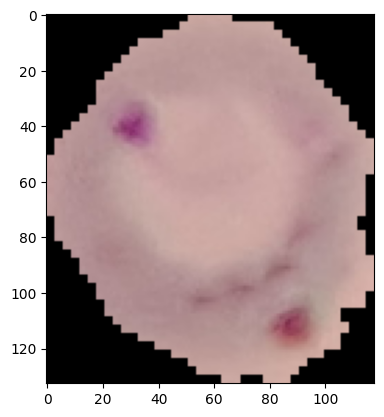

In [ ]:
image1=test_path+'parasitized/'+os.listdir(test_path+'parasitized')[0]
para_image1=imread(image1)
plt.imshow(para_image1)

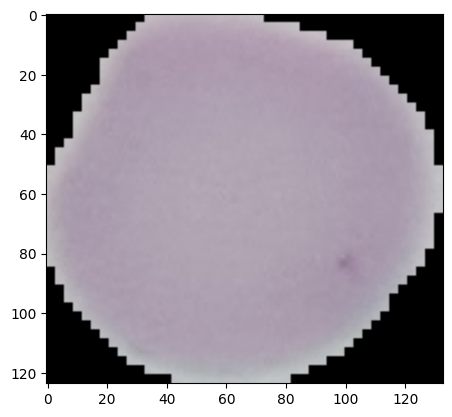

In [ ]:
image2=test_path+'uninfected/'+os.listdir(test_path+'uninfected')[0]
para_image2=imread(image2)
plt.imshow(para_image2)

In [ ]:
para_image1.shape

(133, 118, 3)

In [ ]:
para_image2.shape

(124, 133, 3)

In [ ]:
print(len(os.listdir(test_path+'parasitized')))
print(len(os.listdir(test_path+'uninfected')))
print(len(os.listdir(train_path+'parasitized')))
print(len(os.listdir(train_path+'uninfected')))

1300
1300
12480
12480


In [ ]:
dim1=[]
dim2=[]
for image_filename in os.listdir(test_path+'parasitized'):
    img=test_path+'parasitized'+'/'+image_filename
    d1,d2,d3=imread(img).shape
    dim1.append(d1)
    dim2.append(d2)

In [ ]:
df=pd.DataFrame({'dim1':dim1,'dim2':dim2})

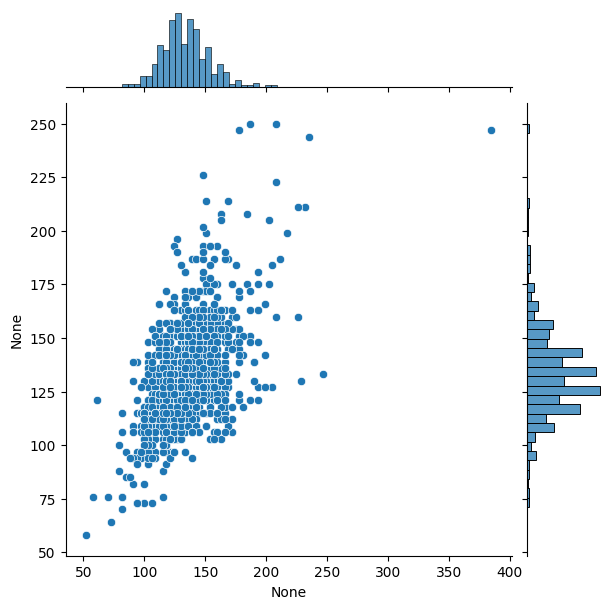

In [ ]:
sns.jointplot(x=dim1,y=dim2,data=df);

In [ ]:
print(np.mean(dim1))
print(np.mean(dim2))

134.64307692307693
133.31846153846155


In [ ]:
dim3=[]
dim4=[]
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')

for image_filename in os.listdir(train_path+'parasitized'):
    if image_filename.lower().endswith(valid_extensions):
      img=train_path+'parasitized'+'/'+image_filename
      d1,d2,d3=imread(img).shape
      dim3.append(d1)
      dim4.append(d2)


In [ ]:
data=pd.DataFrame({'dim1':dim1,'dim2':dim2})

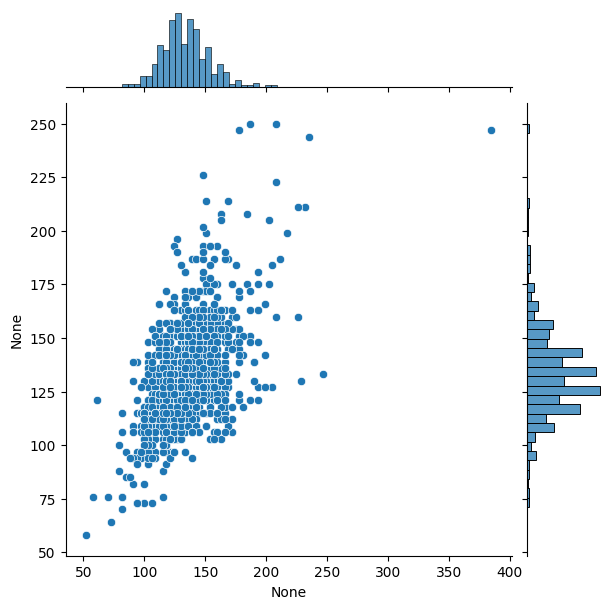

In [ ]:
sns.jointplot(x=dim1,y=dim2,data=data);

In [ ]:
print(np.mean(dim3))
print(np.mean(dim4))

134.360205144643
133.66447632021797


In [ ]:
image_shape=(130,130,3)

In [ ]:
from  tensorflow.keras.preprocessing.image  import  ImageDataGenerator

In [ ]:
imread(train_path+'parasitized/'+os.listdir(train_path+'parasitized')[0]).max()

0.85490197

In [ ]:
image_gen=ImageDataGenerator(
     width_shift_range=0.10, # Modifier la largeur de la photo de 10% maximum
                               height_shift_range=0.10, # Modifier la hauteur de la photo de 10% maximum
                               # rescale=1/255, # Redimensionner l'image en la normalisant
                               shear_range=0.1, # shear signifie couper une partie de l'image (max 10%)
                               zoom_range=0.1, # Zoom de 10% maximum
                               horizontal_flip=True, # Autorise le basculement horizontal
                               fill_mode='nearest' # Remplir les pixels manquants avec la valeur remplie la plus proche
)

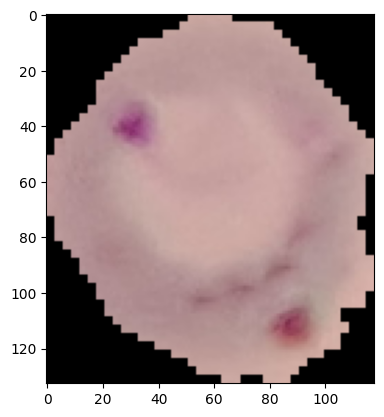

In [ ]:
plt.imshow(para_image1)

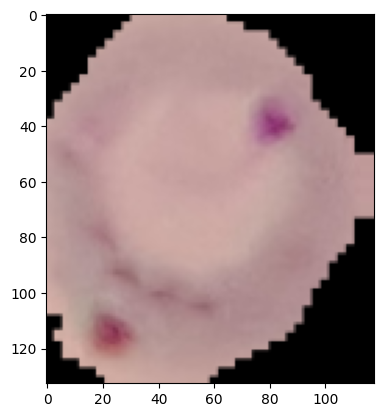

In [ ]:
plt.imshow(image_gen.random_transform(para_image1))

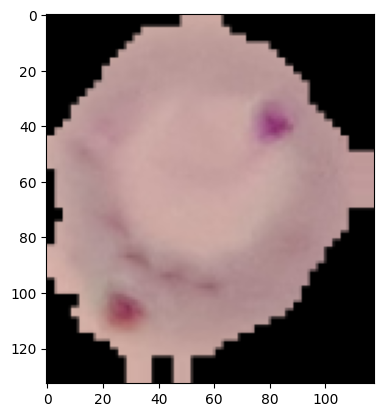

In [ ]:
plt.imshow(image_gen.random_transform(para_image1))

In [ ]:
image_gen.flow_from_directory(train_path)


Found 24958 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [ ]:
from  tensorflow.keras.models  import  Sequential
from  tensorflow.keras.layers  import  Activation,Dropout,Flatten,Dense,Conv2D,MaxPooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from  tensorflow.keras.callbacks  import  EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
train_image_gen=image_gen.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=16,
    class_mode='binary'
)

Found 24958 images belonging to 2 classes.


In [ ]:
test_image_gen=image_gen.flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=16,
    class_mode='binary'
)

Found 2600 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
model.fit(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

In [45]:
from tensorflow.keras.models import load_model
path="/content/drive/MyDrive/PFA/cnn/malaria_detector.h5"
model=load_model(path)

In [46]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [47]:
ypred=model.predict(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 304ms/step


In [49]:
ypred=(ypred > 0.5).astype("int32")

In [50]:
from  sklearn.metrics  import  classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,ypred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [51]:
confusion_matrix(test_image_gen.classes,ypred)

array([[1219,   81],
       [  57, 1243]])

In [52]:
from  tensorflow.keras.preprocessing import image


In [53]:
para_cell = train_path+'/parasitized'+'/C59P20thinF_IMG_20150803_113809_cell_41.png'

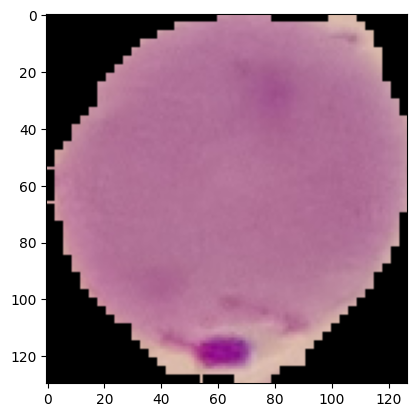

In [54]:
plt.imshow(imread(para_cell))

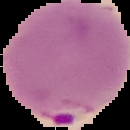

In [55]:
my_image=image.load_img(para_cell,target_size=image_shape)
my_image

In [56]:
my_image = image.img_to_array(my_image)
my_image.shape

(130, 130, 3)

In [57]:
my_image = np.expand_dims(my_image, axis=0)

In [58]:
my_image.shape

(1, 130, 130, 3)

In [59]:
(model.predict(my_image) > 0.5).astype('int32')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([[0]], dtype=int32)